# Assignment 7 vj222hx

## Conceptual
1. SVM aims to create a hyperplane which seperates two classes which tries to maximize the margin to the closest point in each class. If a hyperplane cannot be created between the classes, a slack variable can be added or you can add dimensions to the points which makes it easier to make a hyperplane seperating the classes.
2. SVMs are generally quite robust to overfitting however noisy data can lead to overfitting. Certain kernels such as rbf can be more accurate than linear, but is more susceptible to overfitting. Small values for C allows for some missclassification which reduces overfitting. 

# Practical

Add imports

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Generate 20 random points in two classes

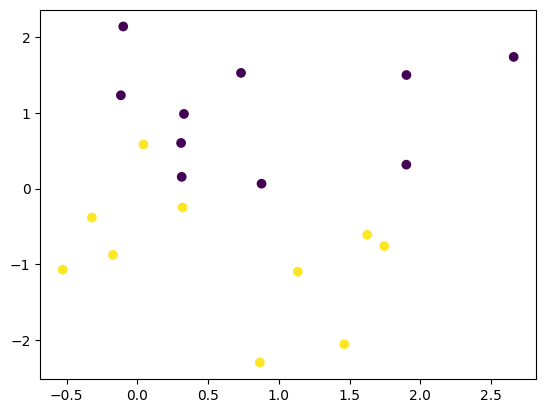

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]
 [-0.10061918  2.14472371]
 [ 1.90159072  1.50249434]
 [ 1.90085595  0.31627214]
 [ 0.87710977  0.06423057]
 [ 0.73211192  1.53035547]
 [ 0.30833925  0.60324647]
 [ 0.3128273   0.15479436]
 [ 0.32875387  0.9873354 ]
 [-0.11731035  1.2344157 ]
 [ 2.65980218  1.74204416]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [289]:
np.random.seed(1)
x = np.random.randn(20, 2)
y = np.concatenate([-np.ones(10), np.ones(10)])
x[y == 1] += 1

plt.scatter(x[:, 0], x[:, 1], c=(3 - y))
plt.show()

print(x)
print(y)

          X1        X2  y
0   1.624345 -0.611756 -1
1  -0.528172 -1.072969 -1
2   0.865408 -2.301539 -1
3   1.744812 -0.761207 -1
4   0.319039 -0.249370 -1
5   1.462108 -2.060141 -1
6  -0.322417 -0.384054 -1
7   1.133769 -1.099891 -1
8  -0.172428 -0.877858 -1
9   0.042214  0.582815 -1
10 -0.100619  2.144724  1
11  1.901591  1.502494  1
12  1.900856  0.316272  1
13  0.877110  0.064231  1
14  0.732112  1.530355  1
15  0.308339  0.603246  1
16  0.312827  0.154794  1
17  0.328754  0.987335  1
18 -0.117310  1.234416  1
19  2.659802  1.742044  1


C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


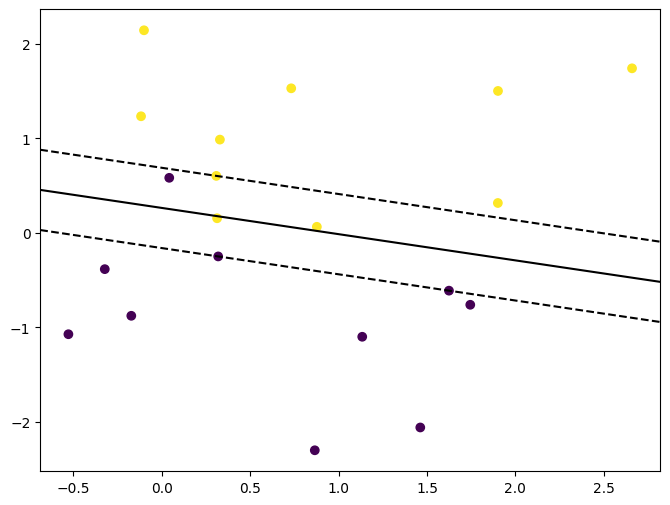

In [290]:
dat = pd.DataFrame({'X1': x[:, 0], 'X2': x[:, 1], 'y': y.astype(int)})
print(dat)

svm = SVC(kernel="linear", C=10)
svm.fit(dat[['X1', 'X2']], dat['y'])

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = svm.decision_function(xy).reshape(xx.shape)

ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='black')

plt.show()

In [291]:
support_vector_indices = svm.support_
print(support_vector_indices)

[ 0  4  9 13 15 16]


C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


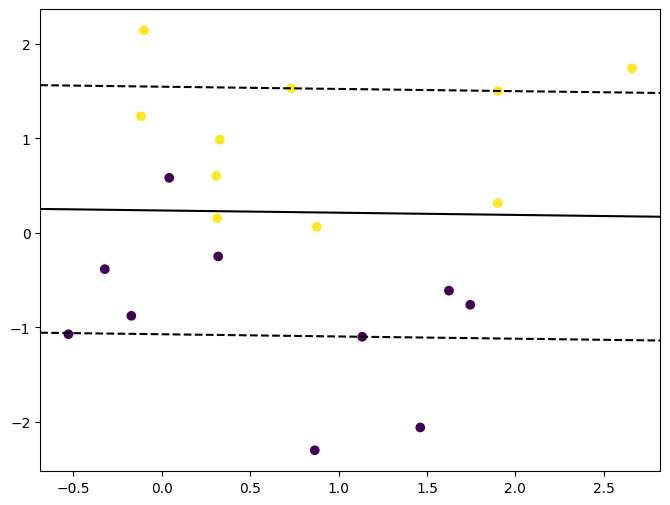

In [292]:
svm = SVC(kernel="linear", C=0.1)
svm.fit(dat[['X1', 'X2']], dat['y'])

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = svm.decision_function(xy).reshape(xx.shape)

ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='black')

plt.show()

The smaller value of C makes it allow for a larger error but also reduces the risk of overfitting. 

In [293]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}

grid_search = GridSearchCV(SVC(kernel="linear"), param_grid, cv=10)
grid_search.fit(dat[['X1', 'X2']], dat['y'])

cv_results = pd.DataFrame(grid_search.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]
print(cv_results)

print("\nBest C:", grid_search.best_params_['C'])
print("Best Accuracy:", grid_search.best_score_)

   param_C  mean_test_score  std_test_score
0    0.001             0.95        0.150000
1    0.010             0.95        0.150000
2    0.100             0.85        0.229129
3    1.000             0.90        0.200000
4    5.000             0.90        0.200000
5   10.000             0.90        0.200000
6  100.000             0.90        0.200000

Best C: 0.001
Best Accuracy: 0.95


Here we are getting a 95% accuracy with a C value of 0.001

Fit a model with the C value

In [294]:
np.random.seed(1)
svm = SVC(kernel="linear", C=0.001)
svm.fit(dat[['X1', 'X2']], dat['y'])
xtest = np.random.randn(20, 2)
ytest = np.random.choice([-1, 1], size=20, replace=True)
xtest[ytest == 1] += 1

ypred = svm.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 6  2]
 [ 2 10]]


C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


With the newly generated datapoints we are getting an accuracy of 80%

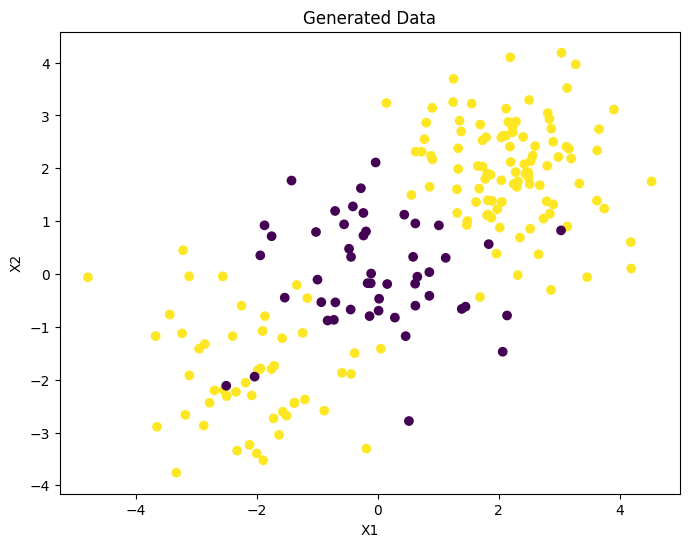

[[ 3.62434536  1.38824359]
 [ 1.47182825  0.92703138]
 [ 2.86540763 -0.3015387 ]
 [ 3.74481176  1.2387931 ]
 [ 2.3190391   1.75062962]
 [ 3.46210794 -0.06014071]
 [ 1.6775828   1.61594565]
 [ 3.13376944  0.90010873]
 [ 1.82757179  1.12214158]
 [ 2.04221375  2.58281521]
 [ 0.89938082  3.14472371]
 [ 2.90159072  2.50249434]
 [ 2.90085595  1.31627214]
 [ 1.87710977  1.06423057]
 [ 1.73211192  2.53035547]
 [ 1.30833925  1.60324647]
 [ 1.3128273   1.15479436]
 [ 1.32875387  1.9873354 ]
 [ 0.88268965  2.2344157 ]
 [ 3.65980218  2.74204416]
 [ 1.80816445  1.11237104]
 [ 1.25284171  3.6924546 ]
 [ 2.05080775  1.36300435]
 [ 2.19091548  4.10025514]
 [ 2.12015895  2.61720311]
 [ 2.30017032  1.64775015]
 [ 0.8574818   1.65065728]
 [ 1.79110577  2.58662319]
 [ 2.83898341  2.93110208]
 [ 2.28558733  2.88514116]
 [ 1.24560206  3.25286816]
 [ 2.51292982  1.70190716]
 [ 2.48851815  1.92442829]
 [ 3.13162939  3.51981682]
 [ 4.18557541  0.60350366]
 [ 0.55588619  1.49553414]
 [ 2.16003707  2.87616892]
 

In [295]:
np.random.seed(1)
x = np.random.randn(200, 2)
x[:100] += 2
x[100:150] -= 2
y = np.concatenate([-np.ones(150), np.ones(50)])
dat = pd.DataFrame({'X1': x[:, 0], 'X2': x[:, 1], 'y': y.astype(int)})

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=(3 - y), cmap="viridis")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Generated Data")
plt.show()

print(x)
print(y)

C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


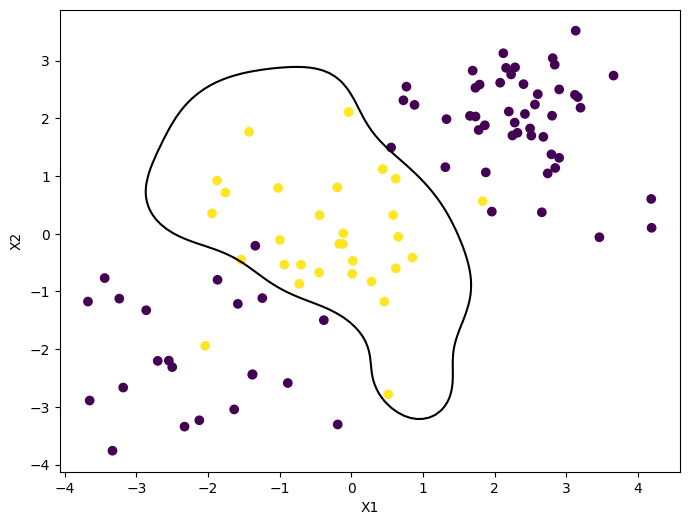

In [296]:
np.random.seed(1)
train_indices = np.random.choice(200, 100, replace=False)

train_data = dat.iloc[train_indices]
test_data = dat.drop(train_indices)

svmfit = SVC(kernel="rbf", gamma=1, C=1)
svmfit.fit(train_data[['X1', 'X2']], train_data['y'])

plt.figure(figsize=(8, 6))
plt.scatter(train_data['X1'], train_data['X2'], c=train_data['y'])
xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = svmfit.decision_function(xy).reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'], colors='black')

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


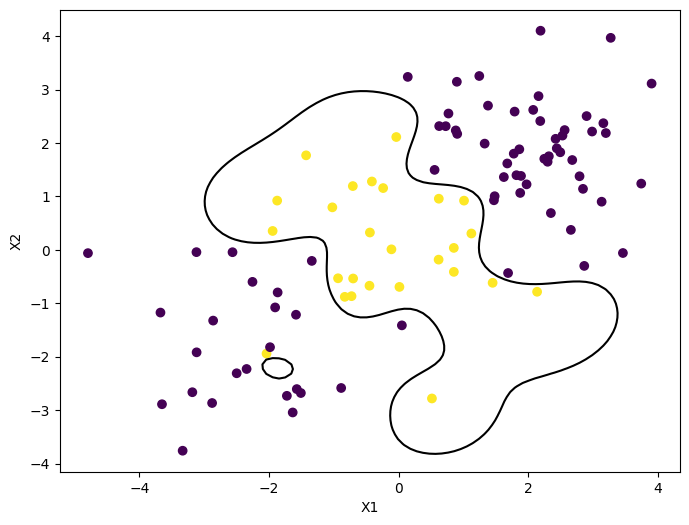

In [297]:
train_indices = np.random.choice(200, 100, replace=False)

train_data = dat.iloc[train_indices]
test_data = dat.drop(train_indices)

svmfit = SVC(kernel="rbf", gamma=1, C=100)
svmfit.fit(train_data[['X1', 'X2']], train_data['y'])

plt.figure(figsize=(8, 6))
plt.scatter(train_data['X1'], train_data['X2'], c=train_data['y'])
xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = svmfit.decision_function(xy).reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'], colors='black')

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [298]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.5, 1]}

grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=10)
grid_search.fit(dat[['X1', 'X2']], dat['y'])

cv_results = pd.DataFrame(grid_search.cv_results_)[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
print(cv_results)

print("\nBest C:", grid_search.best_params_['C'])
print("Best Gamma:", grid_search.best_params_['gamma'])
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

   param_C  param_gamma  mean_test_score  std_test_score
0      0.1          0.5            0.905        0.065000
1      0.1          1.0            0.865        0.063443
2      1.0          0.5            0.940        0.043589
3      1.0          1.0            0.940        0.043589
4     10.0          0.5            0.920        0.045826
5     10.0          1.0            0.920        0.033166
6    100.0          0.5            0.900        0.038730
7    100.0          1.0            0.880        0.090000
8   1000.0          0.5            0.870        0.122882
9   1000.0          1.0            0.865        0.118427

Best C: 1
Best Gamma: 0.5
Best Accuracy: 0.94


Here we got an accuracy of 94% with a C of 1 and a gamma of 0.5

In [299]:
svm = SVC(kernel="rbf", C=1, gamma=0.5)
svm.fit(dat[['X1', 'X2']], dat['y'])

xtest = np.random.randn(100, 2)
xtest[:50] += 2
xtest[50:75] -= 2
ytest = np.concatenate([-np.ones(75), np.ones(25)])

ypred = svm.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[71  4]
 [ 3 22]]


C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


When trying with the test data, we get an accuracy 82% on the training data

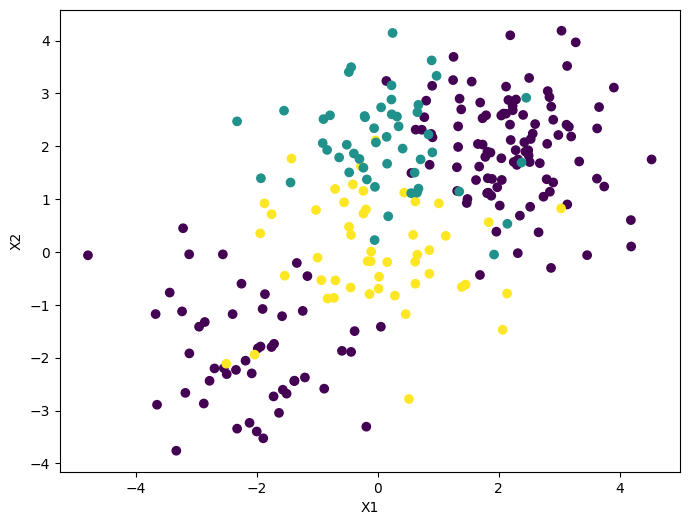

           X1        X2    y
0    3.624345  1.388244 -1.0
1    1.471828  0.927031 -1.0
2    2.865408 -0.301539 -1.0
3    3.744812  1.238793 -1.0
4    2.319039  1.750630 -1.0
..        ...       ...  ...
245  1.347264  1.144185  0.0
246 -0.910924  2.060662  0.0
247  0.707985  1.752115  0.0
248 -0.472958  1.505882  0.0
249 -0.303401  1.760157  0.0

[250 rows x 3 columns]


In [300]:
x = np.vstack([x, np.random.randn(50, 2)])
y = np.concatenate([y, np.zeros(50)])

x[y == 0, 1] += 2 

dat = pd.DataFrame({'X1': x[:, 0], 'X2': x[:, 1], 'y': y})

plt.figure(figsize=(8, 6))
plt.scatter(dat['X1'], dat['X2'], c=dat['y'])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

print(dat)

C:\Users\Viktor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


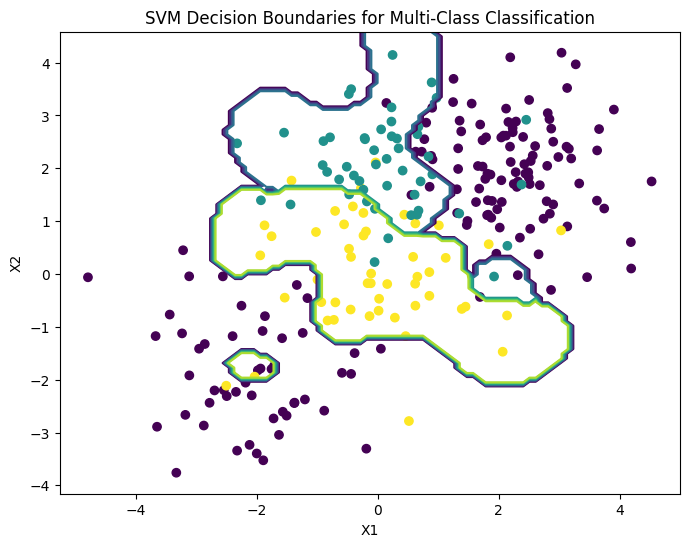

In [301]:
np.random.seed(1)
train_indices = np.random.choice(250, 125, replace=False)

train_data = dat.iloc[train_indices]
test_data = dat.drop(train_indices)

svm = SVC(kernel="rbf", C=10, gamma=1)
svm.fit(train_data[['X1', 'X2']], train_data['y'])

plt.figure(figsize=(8, 6))
plt.scatter(dat['X1'], dat['X2'], c=dat['y'])

xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))

xy = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(xy)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Decision Boundaries for Multi-Class Classification")
plt.show()

In [302]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.5, 1, 2, 3, 4]}


grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=10)
grid_search.fit(dat[['X1', 'X2']], dat['y'])

cv_results = pd.DataFrame(grid_search.cv_results_)[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
print(cv_results)

print("\nBest C:", grid_search.best_params_['C'])
print("Best Gamma:", grid_search.best_params_['gamma'])
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

    param_C  param_gamma  mean_test_score  std_test_score
0       0.1          0.5            0.808    4.995998e-02
1       0.1          1.0            0.772    3.124100e-02
2       0.1          2.0            0.648    4.308132e-02
3       0.1          3.0            0.600    1.110223e-16
4       0.1          4.0            0.600    1.110223e-16
5       1.0          0.5            0.852    4.019950e-02
6       1.0          1.0            0.856    4.079216e-02
7       1.0          2.0            0.836    4.543127e-02
8       1.0          3.0            0.828    4.019950e-02
9       1.0          4.0            0.832    3.487119e-02
10     10.0          0.5            0.848    2.400000e-02
11     10.0          1.0            0.832    4.308132e-02
12     10.0          2.0            0.808    5.878775e-02
13     10.0          3.0            0.792    6.881860e-02
14     10.0          4.0            0.768    8.908423e-02
15    100.0          0.5            0.812    7.166589e-02
16    100.0   

In [303]:
svm = SVC(kernel="rbf", C=1, gamma=0.5)
svm.fit(train_data[['X1', 'X2']], train_data['y'])
y_pred = svm.predict(test_data[['X1', 'X2']])
cm = confusion_matrix(test_data['y'], y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[71  4]
 [ 3 22]]


Here we are getting a 93% accuracy using the training data

Load the datasets

In [304]:
xtrain = pd.read_csv("Khan_xtrain.csv", index_col=0)
xtest = pd.read_csv("Khan_xtest.csv", index_col=0)
ytrain = pd.read_csv("Khan_ytrain.csv", index_col=0)
ytest = pd.read_csv("Khan_ytest.csv", index_col=0)

print(len(xtrain), len(xtrain.columns.tolist()))
print(len(xtest), len(xtest.columns.tolist()))

63 2308
20 2308


In [305]:
ytrain = ytrain.iloc[:, 0]

svm_model = SVC(kernel="linear", C=10)
svm_model.fit(xtrain, ytrain)

print("Number of Support:", svm_model.n_support_)
print("Number of classes:", svm_model.classes_)

Number of Support: [ 7 18  9 20]
Number of classes: [1 2 3 4]


In [306]:
y_train_pred = svm_model.predict(xtrain)
conf_matrix = confusion_matrix(ytrain, y_train_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=svm_model.classes_, columns=svm_model.classes_)

print(conf_matrix_df)

   1   2   3   4
1  8   0   0   0
2  0  23   0   0
3  0   0  12   0
4  0   0   0  20


In [307]:
y_test_pred = svm_model.predict(xtest)
conf_matrix_test = confusion_matrix(ytest, y_test_pred)

conf_matrix_test_df = pd.DataFrame(conf_matrix_test, index=svm_model.classes_, columns=svm_model.classes_)
print(conf_matrix_test_df)

   1  2  3  4
1  3  0  0  0
2  0  6  0  0
3  0  2  4  0
4  0  0  0  5


Here, we are only getting two predictions wrong which leads to a 90% accuracy